# **Importing libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn import utils

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.preprocessing.sequence import TimeseriesGenerator


import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit


# **Loading the dataset**

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/Nidakhairunnisa/Retail_6/main/Sample%20-%20Superstore.csv', encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **Pre-processing**

In [16]:
# memperbaiki tipe data waktu
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [17]:
# mengganti spasi(" ") menjadi underscore ("_")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## **Korelasi antar variable (numerikal)**

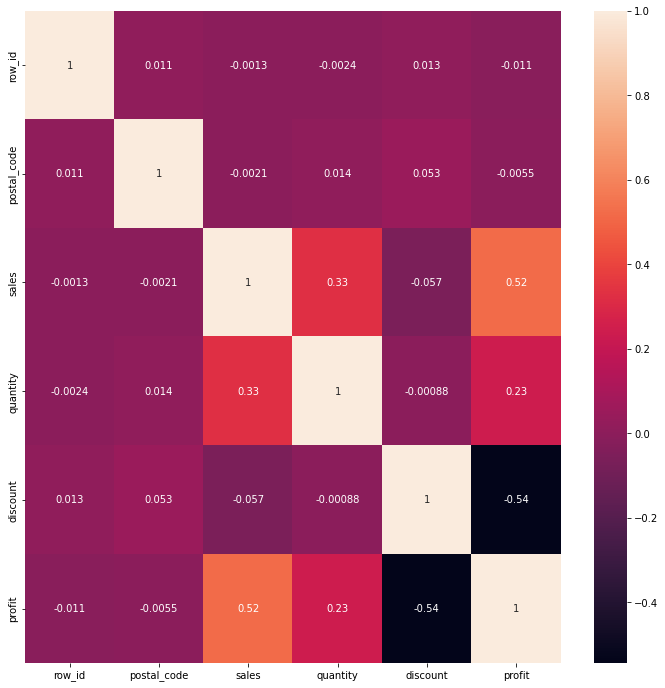

In [18]:
#pearson (tidak sensitif outlier)
#spearman (sensitif outlier)

correlation = df.corr(method='spearman') 

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True) #annot(annotasi) agar tahu valuenya berapa
plt.show()

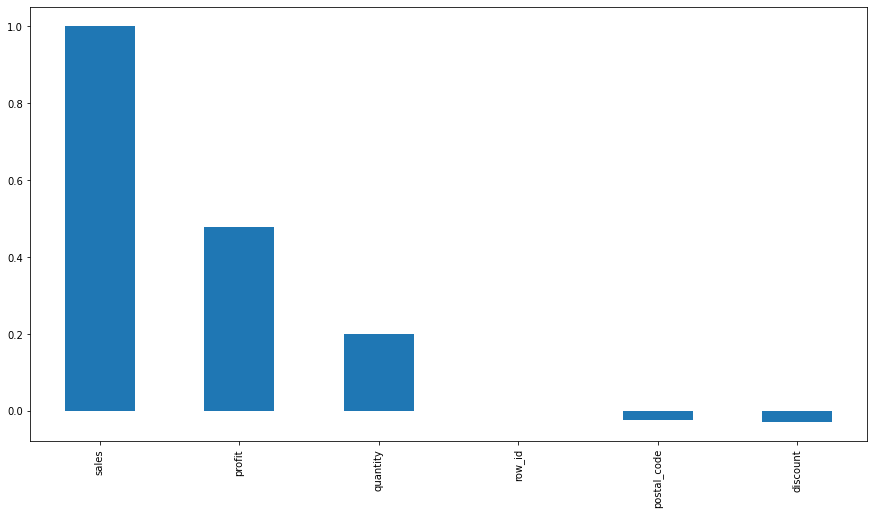

In [19]:
plt.figure(figsize=(15,8))
df.corr()['sales'].sort_values(ascending = False).plot(kind='bar') 

# **Regressi**

In [10]:
sales_data=df[['order_date','sales']]
sales_data=sales_data.sort_values('order_date')
sales_data.head()

,order_date,sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [26]:
# lihat penjualan perhari

sales_data=sales_data.groupby(['order_date'])[['sales']].sum().reset_index()
sales_data

,order_date,sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [27]:
# buatlah tanggal menjadi index
sales_data=sales_data.set_index('order_date')
sales_data.head(20)

,sales
order_date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158
2014-01-09,40.544
2014-01-10,54.830
2014-01-11,9.940
2014-01-13,3553.795


In [33]:
sales_data['Sale_LastMonth']=sales_data['sales'].shift(+1)
sales_data['Sale_2Monthsback']=sales_data['sales'].shift(+2)
sales_data['Sale_3Monthsback']=sales_data['sales'].shift(+3)
sales_data

,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
order_date,,,,
2014-01-06,4407.1000,NaN,NaN,NaN
2014-01-07,87.1580,4407.1000,NaN,NaN
2014-01-09,40.5440,87.1580,4407.1000,NaN
2014-01-10,54.8300,40.5440,87.1580,4407.100
2014-01-11,9.9400,54.8300,40.5440,87.158
...,...,...,...,...
2017-12-26,814.5940,2698.9270,6233.0540,1926.776
2017-12-27,177.6360,814.5940,2698.9270,6233.054
2017-12-28,1657.3508,177.6360,814.5940,2698.927


In [35]:
sales_data=sales_data.dropna()
sales_data

,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
order_date,,,,
2014-01-10,54.8300,40.5440,87.1580,4407.100
2014-01-11,9.9400,54.8300,40.5440,87.158
2014-01-13,3553.7950,9.9400,54.8300,40.544
2014-01-14,61.9600,3553.7950,9.9400,54.830
2014-01-15,149.9500,61.9600,3553.7950,9.940
...,...,...,...,...
2017-12-26,814.5940,2698.9270,6233.0540,1926.776
2017-12-27,177.6360,814.5940,2698.9270,6233.054
2017-12-28,1657.3508,177.6360,814.5940,2698.927


In [30]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [36]:
import numpy as np
x1,x2,x3,y=sales_data['Sale_LastMonth'],sales_data['Sale_2Monthsback'],sales_data['Sale_3Monthsback'],sales_data['sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  40.544    87.158  4407.1   ]
 [  54.83     40.544    87.158 ]
 [   9.94     54.83     40.544 ]
 ...
 [ 177.636   814.594  2698.927 ]
 [1657.3508  177.636   814.594 ]
 [2915.534  1657.3508  177.636 ]]


In [37]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [38]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

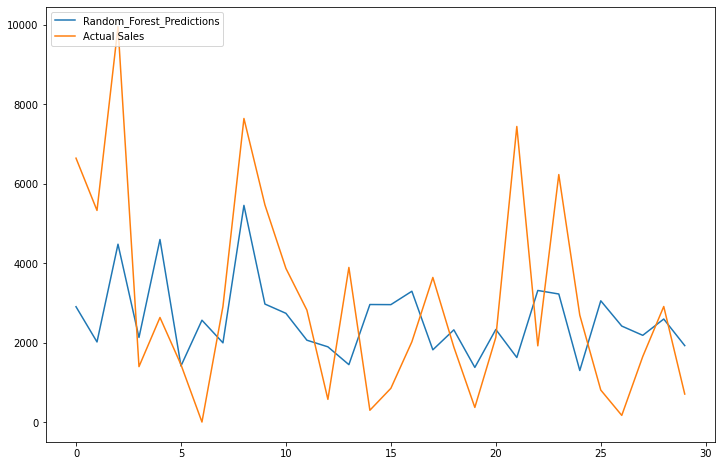

In [39]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

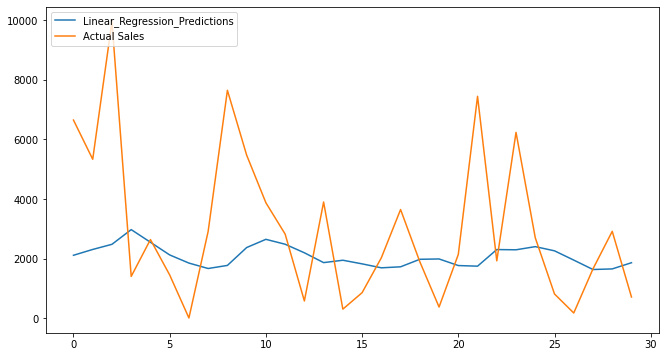

In [40]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_rf= mean_squared_error(pred,y_test)
mse_lr= mean_squared_error(lin_pred,y_test)
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [45]:
print('Mean Squared Error for Random Forest Model is:',mse_rf)
print('Root Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',mse_lr)
print('Root Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 5445770.484206223
Root Mean Squared Error for Random Forest Model is: 2333.6174674111057
Mean Squared Error for Linear Regression Model is: 7075001.512774928
Root Mean Squared Error for Linear Regression Model is: 2659.887500022309


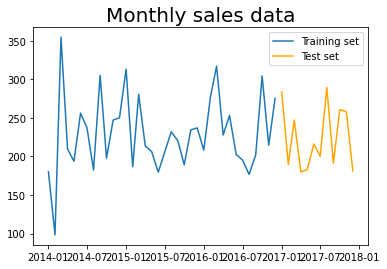

In [ ]:
plt.title('Monthly sales data', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = lambda act, pred: np.sqrt(mean_squared_error(act, pred))

# Arbitrary data
actual_passengers = [300, 290, 320, 400, 500, 350]
predicted_passengers = [291, 288, 333, 412, 488, 344]

# Error metrics
print(f'RMSE: {rmse(actual_passengers, predicted_passengers)}')
print(f'MAPE: {mean_absolute_percentage_error(actual_passengers, predicted_passengers)}')

RMSE: 9.814954576223638
MAPE: 0.024777401477832514


In [ ]:
x_train,x_test,y_train,y_test=df_train[:-12],df_test[-12:], y[:-12], y[-12:]

NameError: ignored

In [ ]:
x_train

,sales
order_date,
2014-01-01,180.213861
2014-02-01,98.258522
2014-03-01,354.719803
2014-04-01,209.595148
2014-05-01,193.838418
2014-06-01,256.260204
2014-07-01,237.387364
2014-08-01,182.414827
2014-09-01,305.139369


In [ ]:
x_test

,sales
order_date,
2017-01-01,283.686284
2017-02-01,189.730219
2017-03-01,247.362827
2017-04-01,179.909045
2017-05-01,182.897150
2017-06-01,216.251942
2017-07-01,200.285027
2017-08-01,289.545358
2017-09-01,191.430614


In [ ]:
y_train

,sales
order_date,
2014-01-01,180.213861
2014-02-01,98.258522
2014-03-01,354.719803
2014-04-01,209.595148
2014-05-01,193.838418
2014-06-01,256.260204
2014-07-01,237.387364
2014-08-01,182.414827
2014-09-01,305.139369


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [ ]:
model.fit(x_train,y_train)
lin_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

ValueError: ignored

In [ ]:
lin_pred=lin_model.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

ValueError: ignored

# Modelling

## RobustScaler

### **Linear Regression**

*RMSE

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)
predictions=reg.predict(x_test)

print('r2_score :',r2_score(y_test,predictions))
print('MSE :', mean_squared_error(y_test, predictions))

r2_score : 1.0
MSE : 3.365806528942984e-28


In [ ]:
hasil = pd.DataFrame({
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': predictions.flatten()}).head(20)

hasil

,Actual Prices,Predicted Prices
0,283.686284,283.686284
1,189.730219,189.730219
2,247.362827,247.362827
3,179.909045,179.909045
4,182.897150,182.897150
5,216.251942,216.251942
6,200.285027,200.285027
7,289.545358,289.545358
8,191.430614,191.430614
9,260.996387,260.996387


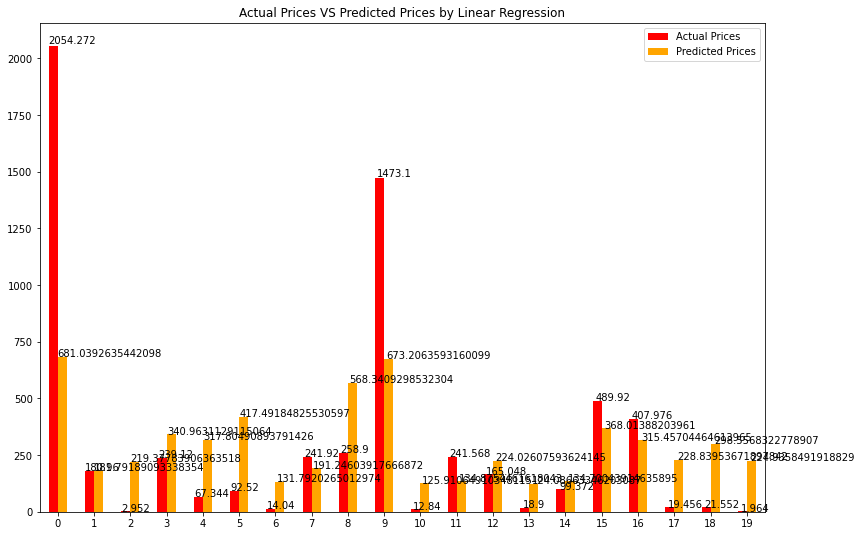

In [ ]:
ax = hasil.plot.bar(rot=0, color=['red', 'orange'], figsize=(13,9))
ax.set_title("Actual Prices VS Predicted Prices by Linear Regression")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

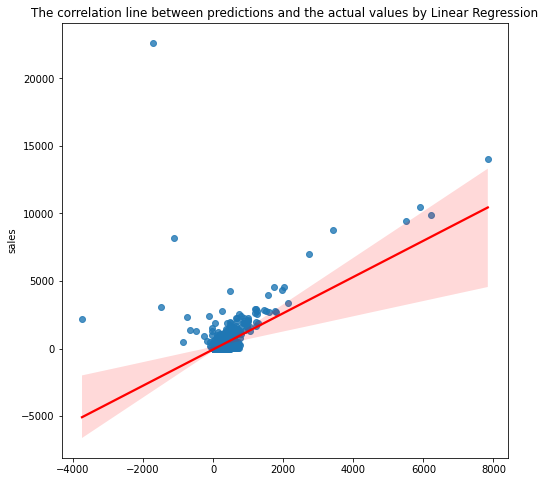

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(predictions, y_test,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Linear Regression")
plt.show()

Text(0.5, 1.0, 'Distributor plot Linear Regression')

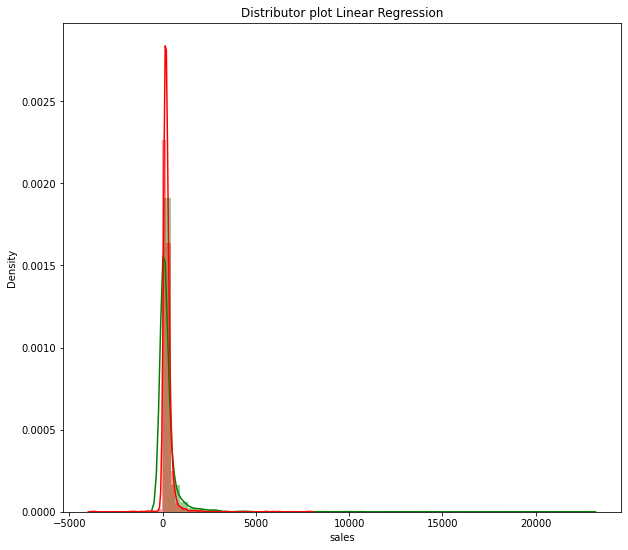

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(predictions, color="red");
plt.title("Distributor plot Linear Regression")

### **Decision Tree Regression**

In [ ]:
decision_tree=DecisionTreeRegressor(min_samples_leaf=.0001)
decision_tree.fit(x_train,y_train)
predictions1=decision_tree.predict(x_test)

print('r2_score :',r2_score(y_test,predictions1))
print('MSE :', mean_squared_error(y_test, predictions1))

r2_score : 0.49668334205990317
MSE : 394645.8298458242


In [ ]:
hasil1 = pd.DataFrame({
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': predictions1.flatten()}).head(20)
hasil1.head(5)

,Actual Prices,Predicted Prices
0,2054.272,2575.944
1,180.960,255.760
2,2.952,2.694
3,239.120,675.960
4,67.344,23.904


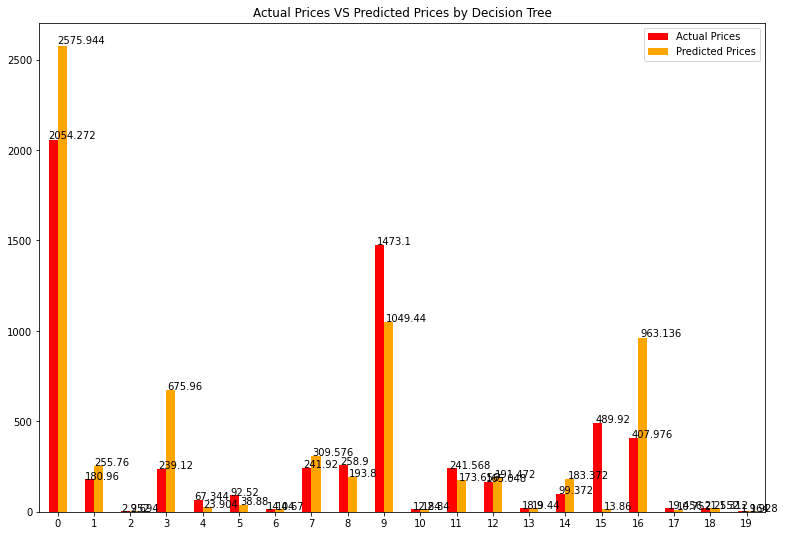

In [ ]:
ax = hasil1.plot.bar(rot=0, color=['red', 'orange'], figsize=(13,9))
ax.set_title("Actual Prices VS Predicted Prices by Decision Tree")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

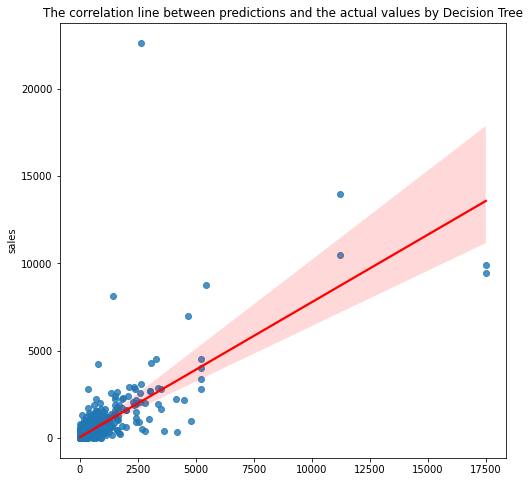

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(predictions1, y_test,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Decision Tree")
plt.show()

Text(0.5, 1.0, 'Distributor plot Decision Tree Regression')

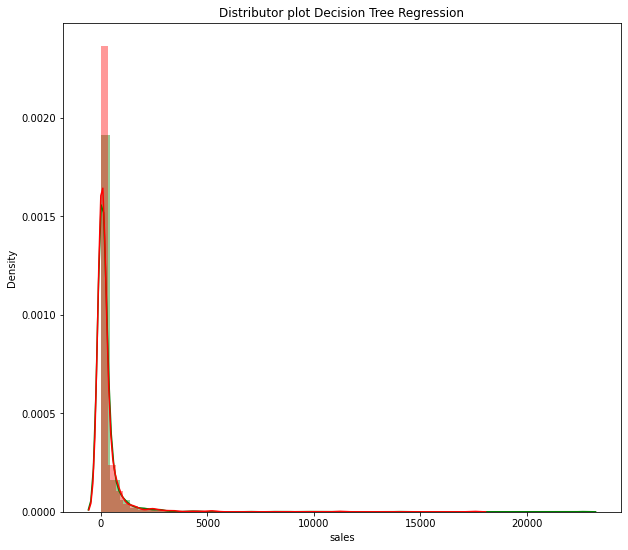

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(predictions1, color="red");
plt.title("Distributor plot Decision Tree Regression")

### **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_poly)

print('r2_score :',r2_score(y,y_pred))
print('MSE :', mean_squared_error(y, y_pred))

r2_score : 0.6818912383835611
MSE : 123552.03968853797


In [ ]:
hasil3 = pd.DataFrame({'Actual Prices':y, 'Predicted Prices':y_pred})
hasil3.head()

,Actual Prices,Predicted Prices
0,261.9600,224.829219
1,731.9400,422.640937
2,14.6200,69.014092
3,957.5775,180.271577
4,22.3680,198.922210


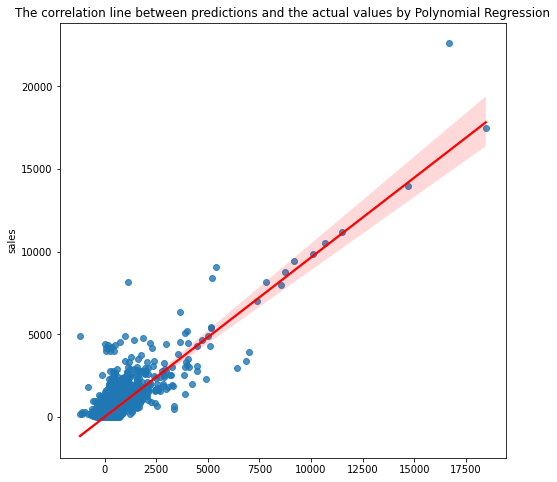

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(y_pred, y,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Polynomial Regression")
plt.show()

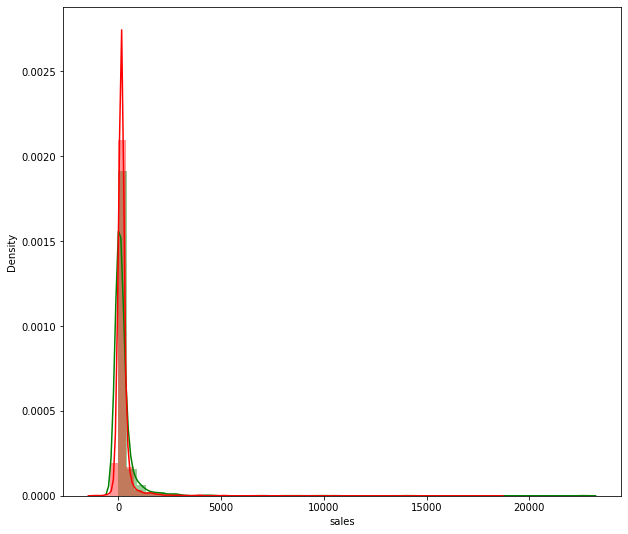

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(y_pred, color="red");

In [ ]:
# Label proportion
pd.Series(y_train).value_counts()

12.960    46
25.920    34
15.552    32
19.440    30
10.368    30
          ..
26.760     1
30.360     1
41.904     1
56.784     1
95.144     1
Name: sales, Length: 5019, dtype: int64

In [ ]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)
x_train.head()

,row_id,postal_code,quantity,discount,profit
0,0.226517,-0.750375,-0.333333,-1.0,-0.082664
1,-0.494492,-0.202915,1.666667,-1.0,0.858374
2,0.583016,0.556772,1.000000,0.0,0.095908
3,-0.523934,0.449196,1.000000,0.0,-0.197166
4,0.190467,-0.750375,-0.333333,-0.5,0.009366


In [ ]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)

## **LSTM**

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

## **MinMaxScaler**

In [ ]:
# normalize the dataset
mm = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = mm.fit_transform(x_train)
scaled_test_data = mm.transform(x_test)

In [ ]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20


InvalidArgumentError: ignored